<a href="https://colab.research.google.com/github/sakshi43/machine_learning/blob/main/cyclone_intensity_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tf_keras
from tf_keras.models import load_model
model = tf_keras.models.load_model('/content/drive/MyDrive/BE_MAJOR/Trained_model1.h5')
model

In [ ]:
!pip uninstall gradio


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.9 MB/s eta

In [ ]:
import gradio as gr
import cv2

In [ ]:
pip install gradio tensorflow numpy pillow

In [ ]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained ResNet50 model
# Load the pre-trained ResNet50 model
print("Loading ResNet50 model...")
model = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
print("ResNet50 model loaded successfully.")

# Define a function to preprocess the image
def preprocess(img):
    if img is None:
        raise ValueError("Input image is empty.")
    img_copy = img.copy()  # Create a copy of the image array
    img_resized = image.array_to_img(img_copy).resize((224, 224))  # Resize the copied image to (224, 224)
    img = image.img_to_array(img_resized)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


# Define a function to predict the class of the image
def predict_cyclone(img):
    img = preprocess(img)
    print("Preprocessed Image Shape:", img.shape)  # Debug
    preds = model.predict(img)
    print("Predictions:", preds)  # Debug
    # Decode the prediction
    decoded_preds = decode_predictions(preds, top=1)[0][0]
    # Get the label and confidence
    label = decoded_preds[1]
    confidence = decoded_preds[2]
    return f"Prediction: {label}, Confidence: {confidence:.4f}"

iface = gr.Interface(fn=predict_cyclone,
                     inputs="image",
                     outputs="text",
                     title="Cyclone Image Classifier",
                     description="Upload an image of a cyclone to predict."
                    )

iface.launch(debug=True)


102967424/102967424 [==============================] - 3s 0us/step
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Could not create share link. Missing file: /usr/local/lib/python3.10/dist-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.10/dist-packages/gradio


<IPython.core.display.Javascript object>

In [ ]:
image=cv2.imread('/content/drive/MyDrive/BE_MAJOR/normalized_img/img118.jpg')

In [ ]:
from PIL import Image
import numpy as np

def image_to_pixels(image_path):
    img = Image.open('/content/drive/MyDrive/BE_MAJOR/normalized_img')
    return np.array(img)


In [ ]:
pip install opencv-python


In [ ]:
import os
def read_images_to_pixels(image_folder):
    pixel_arrays = []
    for filename in os.listdir(image_folder):
        try:
            filepath = os.path.join(image_folder, filename)
            image = Image.open(filepath)
            pixel_array = np.array(image)
            pixel_arrays.append(pixel_array)
        except Exception as e:
            print(f"Error reading {filepath}: {e}")
    return np.array(pixel_arrays)
image_folder = "/content/drive/MyDrive/BE_MAJOR/normalized_img"
pixels = read_images_to_pixels(image_folder)
print(pixels.shape)  # Example output: (num_images, height, width, channels)


In [ ]:
# import os
# import cv2
# import matplotlib.pyplot as plt

# def calculate_histogram(img_path):
#     img = cv2.imread(img_path)
#     #For grayscale images, there's only one channel (0-indexed)
#     hist = cv2.calcHist([img], [0], None, [256], [0, 255])
#     return hist

# def thresholding(folder_path):
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust the file extensions as needed
#             img_path = os.path.join(folder_path, filename)
#             hist = calculate_histogram(img_path)

#             plt.plot(hist)
#             plt.title(f'Histogram for {filename}')
#             plt.xlabel('Pixel Value')
#             plt.ylabel('Frequency')
#             plt.show()

# if __name__ == '__main__':
#     folder_path = "/content/drive/MyDrive/BE_MAJOR/normalized_img"
#     thresholding(folder_path)


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(img_path):
    img = cv2.imread(img_path)
    hist = cv2.calcHist([img], [0], None, [256], [0, 255])
    return hist

def thresholding(folder_path):
    overall_hist = None

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith((".jpg", ".png")):  # Adjust the file extensions as needed
                img_path = os.path.join(root, filename)
                hist = calculate_histogram(img_path)

                if overall_hist is None:
                    overall_hist = hist
                else:
                    overall_hist += hist

    plt.plot(overall_hist)
    plt.title('Overall Histogram for the Image Folder')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

if __name__ == '__main__':
    folder_path = "/content/drive/MyDrive/BE_MAJOR/normalized_img"
    thresholding(folder_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
])

In [ ]:
IMAGE_SIZE=256
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1/255)
])

In [ ]:
import numpy as np

def gaussian_thresholding(image, sigma):


  # Apply a Gaussian filter to the image
  filtered_image = np.exp(-np.square(image - np.mean(image)) / (2 * sigma**2))

  # Calculate the mean of the filtered image
  mean = np.mean(filtered_image)

  # Apply thresholding
  thresholded_image = np.where(filtered_image > mean, 255, 0)

  return thresholded_image

# Example usage
image = np.random.randint(0, 256, size=(256, 256))  # Generate a random grayscale image
sigma = 10  # Set the standard deviation

thresholded_image = gaussian_thresholding(image, sigma)

# You can now process the thresholded_image further
print(thresholded_image.shape)


(256, 256)


Otsu's method is another automatic thresholding technique used for image segmentation. It aims to find an optimal threshold value by maximizing the variance between two classes of pixels (foreground and background) in a grayscale image.

Applying multiple thresholds using adaptive thresholding involves segmenting an image into multiple regions, each with its own optimized threshold value. Here's a general approach you can follow:

1. Choose an Adaptive Thresholding Method:

Common methods include mean-C (average pixel intensity in a neighborhood minus a constant) and Gaussian-C (weighted average of neighborhood pixel intensities minus a constant). Choose based on your image characteristics and desired outcome.
2. Select Block Size and Constant:

Block size: This defines the neighborhood area used to calculate the threshold for each pixel. A larger size helps smooth out noise but might miss details. Start with a small size and increase it iteratively if needed.
Constant: This value is subtracted from the mean or weighted sum in the chosen adaptive method. A higher constant leads to a higher threshold, potentially losing details. Experiment with different values to find a balance.

In [ ]:
import cv2
import numpy as np
!pip install opencv-contrib-python
import cv2.ximgproc
from google.colab.patches import cv2_imshow
def apply_adaptive_threshold(image, method, block_size, c_value):
    if method == 'mean':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c_value)
    elif method == 'gaussian':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c_value)
    elif method == 'otsu':
        _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thresholded


image = cv2.imread('/content/drive/MyDrive/BE_MAJOR/normalized_img/image4.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters
block_size = 11
c_value = 2

# Apply adaptive thresholding for different methods
mean_thresholded = apply_adaptive_threshold(image, 'mean', block_size, c_value)
gaussian_thresholded = apply_adaptive_threshold(image, 'gaussian', block_size, c_value)
otsu_thresholded = apply_adaptive_threshold(image, 'otsu', block_size, c_value)


print("Threshold value for Adaptive Mean Thresholding:", np.mean(mean_thresholded))
print("Threshold value for Adaptive Gaussian Thresholding:",np.mean( gaussian_thresholded))
print("Threshold value for Adaptive otsu Thresholding:",np.mean( otsu_thresholded))

cv2.waitKey(0)
cv2.destroyAllWindows()


Threshold value for Adaptive Mean Thresholding: 141.01960784313727
Threshold value for Adaptive Gaussian Thresholding: 143.7843137254902
Threshold value for Adaptive otsu Thresholding: 119.11764705882354


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def apply_adaptive_threshold(image, method, block_size, c_value):
    if method == 'mean':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c_value)
    elif method == 'gaussian':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c_value)
    elif method == 'otsu':
        _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thresholded

# Function to resize image
def resize_image(image, new_size):
    return cv2.resize(image, new_size)

# Folder path containing images
folder_path = '/content/drive/MyDrive/BE_MAJOR/normalized_img/'

# Parameters
block_size = 11
c_value = 2
new_image_size = (256, 256)  # New size for resizing images

# Lists to store data
image_names = []
mean_threshold_values = []
gaussian_threshold_values = []
otsu_threshold_values = []

# Loop through all images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Add more file extensions if needed
        image_path = os.path.join(folder_path, filename)

        # Read the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Resize the image
        resized_image = resize_image(image, new_image_size)

        # Apply adaptive thresholding for different methods
        mean_thresholded = apply_adaptive_threshold(resized_image, 'mean', block_size, c_value)
        gaussian_thresholded = apply_adaptive_threshold(resized_image, 'gaussian', block_size, c_value)
        otsu_thresholded = apply_adaptive_threshold(resized_image, 'otsu', block_size, c_value)

        # Store data in lists
        image_names.append(filename)
        mean_threshold_values.append(np.mean(mean_thresholded))
        gaussian_threshold_values.append(np.mean(gaussian_thresholded))
        otsu_threshold_values.append(np.mean(otsu_thresholded))

# Create a DataFrame
data = {
    'Image Name': image_names,
    'Mean Threshold': mean_threshold_values,
    'Gaussian Threshold': gaussian_threshold_values,
    'Otsu Threshold': otsu_threshold_values
}
df = pd.DataFrame(data)

# Perform clustering using KMeans
num_clusters = 3  # Change the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Mean Threshold', 'Gaussian Threshold', 'Otsu Threshold']])

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/BE_MAJOR/threshold_data.csv'
df.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Data saved to /content/drive/MyDrive/BE_MAJOR/threshold_data.csv


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


data = pd.read_csv("/content/drive/MyDrive/BE_MAJOR/threshold_data.csv")


In [ ]:
data.head(10)

,Image Name,Mean Threshold,Gaussian Threshold,Otsu Threshold,Cluster
0,image4.jpg,142.332458,145.523071,121.130447,0
1,image3.jpg,143.966675,150.445175,131.060257,0
2,image2.jpg,145.091171,151.211700,127.138138,0
3,image6.jpg,143.935547,147.939377,130.180893,0
4,image1.jpg,146.367416,152.943192,126.667328,0
5,image5.jpg,144.052277,151.059952,129.597244,0
6,image9.jpg,131.854019,137.309189,102.656021,0
7,image10.jpg,136.982346,143.453064,99.652176,2
8,image7.jpg,145.005569,151.631927,128.476639,0
9,imag7.jpg,144.060059,150.441284,131.048584,0


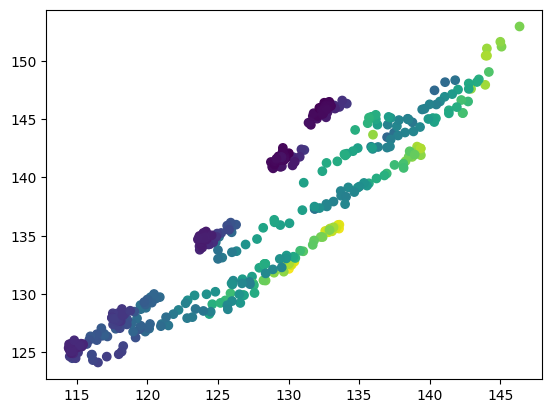

In [ ]:
# @title Comparison of Threshold Types

import matplotlib.pyplot as plt
_ = plt.scatter(data['Mean Threshold'], data['Gaussian Threshold'], c=data['Otsu Threshold'])

In [ ]:
# new_image = cv2.imread('/content/drive/MyDrive/BE_MAJOR/normalized_img/img91.jpg')
# new_image = cv2.resize(new_image, (128, 128))  # Resize image if needed
# new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension
# predicted_intensity = model.predict(new_image)
# print(f'Predicted Intensity: {predicted_intensity[0]}')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("/content/drive/MyDrive/cluster1.csv")

In [ ]:
train_dir="/content/drive/MyDrive/BE_MAJOR/normalized_img"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='File_Path',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )

Found 418 validated image filenames.


In [ ]:
# from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
# import tensorflow as tf
# from tensorflow.keras import regularizers
# from tensorflow.keras.models import Model
# NO_CHANNELS=3

# inputs=Input(shape=(256,256,3))
# y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

# y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

# y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

# y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

# y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

# y= Flatten()(y)
# outputs=Dense(1,activation='linear')(y)
# model_1=Model(inputs=inputs,outputs=outputs)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Input, Activation
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.models import Model

NO_CHANNELS = 3

# Define the input layer
inputs = Input(shape=(256, 256, 3), name='input_layer')

# First convolutional block
y = Conv2D(256, 3, activation='relu', padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y = BatchNormalization()(y)
y = Conv2D(256, 3, activation='relu', padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = BatchNormalization()(y)
y = MaxPool2D()(y)

# Second convolutional block
y = Conv2D(64, 3, activation='relu', padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = BatchNormalization()(y)
y = Conv2D(32, 3, activation='relu', padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = BatchNormalization()(y)
y = MaxPool2D()(y)

# Third convolutional block
y = Conv2D(32, 3, activation='relu', padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = BatchNormalization()(y)
y = Conv2D(16, 3, activation='relu', padding="same", kernel_initializer="he_normal", kernel_regularizer=regularizers.L1L2(0.01))(y)
y = BatchNormalization()(y)
y = MaxPool2D()(y)

# Flatten the output and add a dense layer for prediction
y = Flatten()(y)
outputs = Dense(1, activation='linear')(y)

# Define the model
model_1 = Model(inputs=inputs, outputs=outputs)

# Display the model summary
model_1.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 256)     1024      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 256)     1024      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 256)     0     

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 256)     1024      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 256)     1024      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 256)     0     

In [ ]:
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                metrics=["mse"])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10,mode='min')

In [ ]:
history_1=model_1.fit(train_data,
                      epochs=5,callbacks=[early_stopping])

Epoch 1/5
27/27 [==============================] - 2304s 85s/step - loss: 22649.1602 - mse: 22431.0977
Epoch 2/5
27/27 [==============================] - 2274s 84s/step - loss: 10861.0527 - mse: 10638.2852
Epoch 3/5
27/27 [==============================] - 2202s 81s/step - loss: 10406.7061 - mse: 10184.9375
Epoch 4/5
27/27 [==============================] - 2193s 81s/step - loss: 9675.7012 - mse: 9455.7871
Epoch 5/5
27/27 [==============================] - 2228s 82s/step - loss: 9895.6982 - mse: 9677.6582


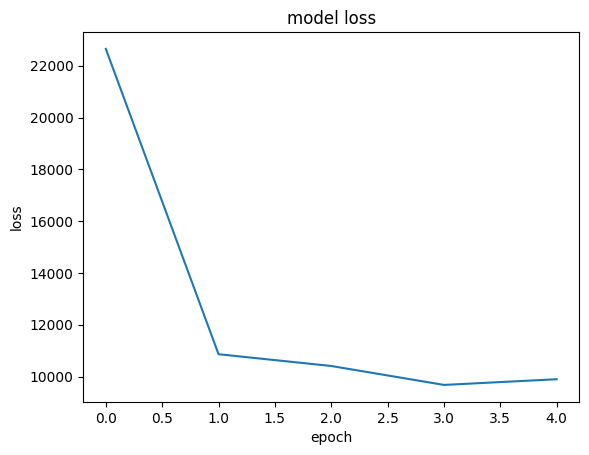

In [ ]:
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
def load_and_prep_image(filename, img_shape=256):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

1/1 [==============================] - 3s 3s/step


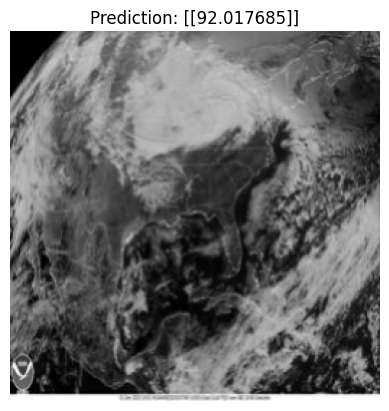

In [ ]:
pred_and_plot(model_1,"/content/drive/MyDrive/BE_MAJOR/normalized_img/img130.jpg")

1/1 [==============================] - 5s 5s/step


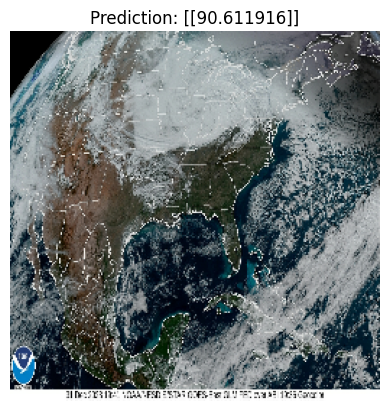

In [ ]:
import matplotlib.pyplot as plt
pred_and_plot(model_1,"/content/drive/MyDrive/major_project/img120.jpg")

1/1 [==============================] - 1s 1s/step


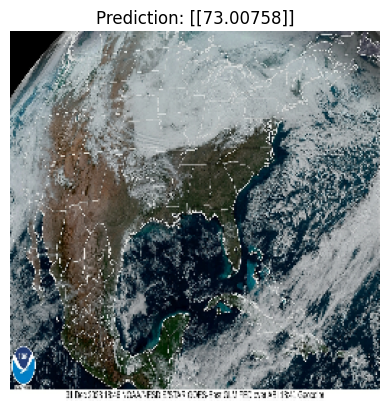

In [ ]:
pred_and_plot(model_1,"/content/drive/MyDrive/major_project/img64.jpg")

1/1 [==============================] - 4s 4s/step


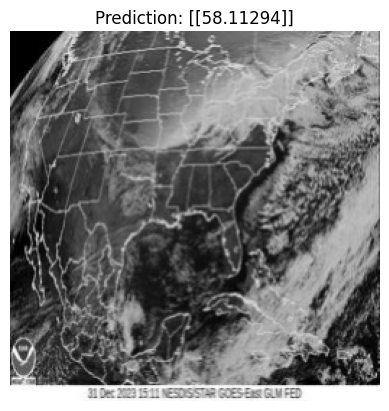

In [ ]:
pred_and_plot(model_1,"/content/drive/MyDrive/BE_MAJOR/normalized_img/image13.jpg")

1/1 [==============================] - 2s 2s/step


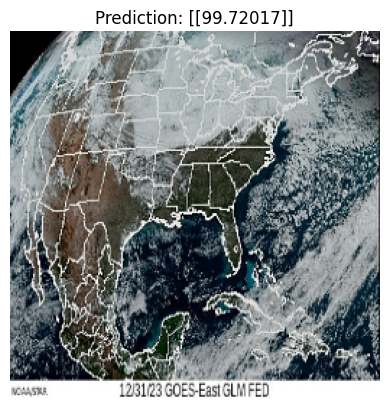

In [ ]:
pred_and_plot(model_1,"/content/drive/MyDrive/major_project/img99.jpg")

1/1 [==============================] - 2s 2s/step


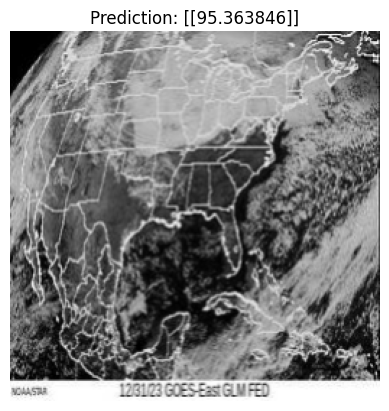

In [ ]:
pred_and_plot(model_1,"/content/drive/MyDrive/BE_MAJOR/normalized_img/img83.jpg")

In [ ]:
import tensorflow as tf

# Assuming model_1 is your Keras model
model_1.save("Trained_model1.h5")

# Now you can load the model using the load_model function
loaded_model = tf.keras.models.load_model('Trained_model1.h5')


In [ ]:
import pickle
filename= "Trained_model1.pkl"
a=open(filename,'wb')
pickle.dump(model_1,a)
a.flush()
a.close()

In [ ]:
from google.colab import files
files.download(filename)

In [ ]:
import pickle
filename= "Trained_model.h5"
a=open(filename,'wb')
pickle.dump(model_1,a)
a.flush()
a.close()

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/feature_wind.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df.head(5)

,#,Name,Date,Time,Latitude,Longitude,max_winds(kt),Landfall_Country
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1940s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-----,08/25/1946,1900Z,22.1,97.8,35.0,Mexico
4,4,-----,09-12-1946,1700Z,25.0,78.2,55.0,Bahamas


In [ ]:
df.shape

(403, 8)

In [ ]:
df.size

3224

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 401 non-null    object 
 1   Name              372 non-null    object 
 2   Date              372 non-null    object 
 3   Time              372 non-null    object 
 4   Latitude          372 non-null    float64
 5   Longitude         372 non-null    float64
 6   max_winds(kt)     372 non-null    float64
 7   Landfall_Country  372 non-null    object 
dtypes: float64(3), object(5)
memory usage: 25.3+ KB


In [ ]:

df.describe()

,Latitude,Longitude,max_winds(kt)
count,372.000000,372.000000,372.000000
mean,20.830645,75.569355,47.284946
std,7.659321,15.295532,8.626386
min,8.800000,8.900000,35.000000
25%,17.000000,62.900000,40.000000
50%,19.500000,76.950000,45.000000
75%,22.200000,86.800000,55.000000
max,48.500000,97.900000,60.000000


In [ ]:
df.isnull().sum()

#                    2
Name                31
Date                31
Time                31
Latitude            31
Longitude           31
max_winds(kt)       31
Landfall_Country    31
dtype: int64

In [ ]:
df.isnull().sum().sum()

219

In [ ]:
df.tail(10)

,#,Name,Date,Time,Latitude,Longitude,max_winds(kt),Landfall_Country
393,13,Laura,08/25/2020,0000Z,22.3,83.3,55.0,Cuba
394,24,Alpha,09/18/2020,1840Z,40.0,8.9,45.0,Portugal
395,29,Eta,11-08-2020,0855Z,21.5,79.2,55.0,Cuba
396,5,Elsa,07-05-2021,1830Z,22.2,81.6,55.0,Cuba
397,6,Fred,08-11-2021,1700Z,18.4,70.1,40.0,Doninican Republic
398,7,Grace,08/16/2021,1630Z,17.7,71.4,35.0,Doninican Republic
399,7,Grace,08/17/2021,1400Z,18.2,76.6,50.0,Jamaica
400,2,Bonnie,07-02-2022,0300Z,11.0,83.8,50.0,Nicaragua
401,7,Fiona,09/16/2022,2315Z,16.4,61.4,50.0,Guadeloupe
402,17,Nicole,11-09-2022,1700Z,26.5,77.1,60.0,Bahamas


In [ ]:
df1=df.drop(['#','Name','Date','Time'],axis=1)

In [ ]:
df1.head(4)

,Latitude,Longitude,max_winds(kt),Landfall_Country
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,22.1,97.8,35.0,Mexico


In [ ]:
df1['Landfall_Country'].unique()

array([nan, 'Mexico', 'Bahamas', 'Cuba', 'St. Lucia',
       'Dominican Republic', 'Honduras', 'Montserrat', 'Bermuda',
       'Belize', 'Dominica', 'Cape Verde Islands', 'Guadeloupe',
       'Turks and Caicos Islands', 'Antigua', 'St. Barthelemy',
       'Anguilla', 'Panama', 'St. Vincent', 'Canada', 'Martinique',
       'Grenada', 'Colombia', 'Azores', 'Trinidad', 'Venezuela',
       'Nicaragua', 'Jamaica', 'Barbuda', 'British Virgin Islands',
       'Mexico/Belize', 'Puerto Rico', 'Haiti', 'Caicos', 'Guadaloupe',
       'Honduras/Nicaragua', 'Barbados', 'US Virgin Islands',
       'Turks and Caicos', 'St.Vincent', 'Virgin Islands', 'Nevis',
       'Portugal', 'Doninican Republic'], dtype=object)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          372 non-null    float64
 1   Longitude         372 non-null    float64
 2   max_winds(kt)     372 non-null    float64
 3   Landfall_Country  372 non-null    object 
dtypes: float64(3), object(1)
memory usage: 12.7+ KB


In [ ]:
df1['Longitude'].fillna(df1['Longitude'].mean(),inplace=True)

In [ ]:
df1['Latitude '].fillna(df1['Latitude '].mean(),inplace=True)

In [ ]:
df1['max_winds(kt)'].fillna(df1['max_winds(kt)'].mean() ,inplace=True)

In [ ]:
df1['Landfall_Country'].bfill(inplace=True)

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df1.isnull().sum()

Latitude            0
Longitude           0
max_winds(kt)       0
Landfall_Country    0
dtype: int64

In [ ]:
df1.groupby("Landfall_Country")["Landfall_Country"].agg("count")

Landfall_Country
Anguilla                     2
Antigua                      6
Azores                       8
Bahamas                     26
Barbados                     6
Barbuda                      2
Belize                      16
Bermuda                      4
British Virgin Islands       2
Caicos                       4
Canada                      20
Cape Verde Islands           2
Colombia                     2
Cuba                        62
Dominica                     2
Dominican Republic          20
Doninican Republic           4
Grenada                      4
Guadaloupe                   2
Guadeloupe                   6
Haiti                        6
Honduras                     6
Honduras/Nicaragua           2
Jamaica                      8
Martinique                   4
Mexico                      93
Mexico/Belize                2
Montserrat                   8
Nevis                        2
Nicaragua                   12
Panama                       2
Portugal              

In [ ]:
import numpy as np
df1['max_winds(kt)'].max()

60.0

In [ ]:
df1['Longitude'].max()

97.9

In [ ]:
df1['Latitude '].max()

48.5

In [ ]:
df1.tail(5)

,Latitude,Longitude,max_winds(kt),Landfall_Country
398,17.7,71.4,35.0,Doninican Republic
399,18.2,76.6,50.0,Jamaica
400,11.0,83.8,50.0,Nicaragua
401,16.4,61.4,50.0,Guadeloupe
402,26.5,77.1,60.0,Bahamas


In [ ]:
len(df1['Landfall_Country'].unique())

43

In [ ]:


df1['Landfall_Country']=df1['Landfall_Country'].apply(lambda x: x.strip())
location_stat=df1.groupby("Landfall_Country")['Landfall_Country'].agg("count")
location_stat

Landfall_Country
Anguilla                     2
Antigua                      6
Azores                       8
Bahamas                     26
Barbados                     6
Barbuda                      2
Belize                      16
Bermuda                      4
British Virgin Islands       2
Caicos                       4
Canada                      20
Cape Verde Islands           2
Colombia                     2
Cuba                        62
Dominica                     2
Dominican Republic          20
Doninican Republic           4
Grenada                      4
Guadaloupe                   2
Guadeloupe                   6
Haiti                        6
Honduras                     6
Honduras/Nicaragua           2
Jamaica                      8
Martinique                   4
Mexico                      93
Mexico/Belize                2
Montserrat                   8
Nevis                        2
Nicaragua                   12
Panama                       2
Portugal              

In [ ]:
dummies=pd.get_dummies(df1['Landfall_Country'])
dummies

,Anguilla,Antigua,Azores,Bahamas,Barbados,Barbuda,Belize,Bermuda,British Virgin Islands,Caicos,...,St. Barthelemy,St. Lucia,St. Vincent,St.Vincent,Trinidad,Turks and Caicos,Turks and Caicos Islands,US Virgin Islands,Venezuela,Virgin Islands
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
400,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y=df1['max_winds(kt)']

In [ ]:
X=df1.drop(['max_winds(kt)'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Landfall_Country']= le.fit_transform(df1['Landfall_Country'])

df1['Landfall_Country'].unique()

array([25,  3, 13, 34, 15, 21, 27,  7,  6, 14, 11, 19, 39,  1, 33,  0, 30,
       35, 10, 24, 17, 12,  2, 37, 41, 29, 23,  5,  8, 26, 32, 20,  9, 18,
       22,  4, 40, 38, 36, 42, 28, 31, 16])

In [ ]:
data=pd.concat([df1,dummies],axis=1)

In [ ]:
data.head(5)

,Latitude,Longitude,max_winds(kt),Landfall_Country,Anguilla,Antigua,Azores,Bahamas,Barbados,Barbuda,...,St. Barthelemy,St. Lucia,St. Vincent,St.Vincent,Trinidad,Turks and Caicos,Turks and Caicos Islands,US Virgin Islands,Venezuela,Virgin Islands
0,20.830645,75.569355,47.284946,25,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20.830645,75.569355,47.284946,25,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20.830645,75.569355,47.284946,25,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,22.100000,97.800000,35.000000,25,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,25.000000,78.200000,55.000000,3,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.drop(['Landfall_Country'],axis=1,inplace=True)

In [ ]:
data.head(5)

,Latitude,Longitude,max_winds(kt),Anguilla,Antigua,Azores,Bahamas,Barbados,Barbuda,Belize,...,St. Barthelemy,St. Lucia,St. Vincent,St.Vincent,Trinidad,Turks and Caicos,Turks and Caicos Islands,US Virgin Islands,Venezuela,Virgin Islands
0,20.830645,75.569355,47.284946,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20.830645,75.569355,47.284946,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20.830645,75.569355,47.284946,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,22.100000,97.800000,35.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,25.000000,78.200000,55.000000,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x=data.drop(['max_winds(kt)'],axis=1)

In [ ]:
y=data['max_winds(kt)']

In [ ]:
x.shape

(403, 45)

In [ ]:
y.shape

(403,)

In [ ]:
y.head(5)

0    47.284946
1    47.284946
2    47.284946
3    35.000000
4    55.000000
Name: max_winds(kt), dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [ ]:
x_train.shape

(382, 45)

In [ ]:
x_test.shape

(21, 45)

In [ ]:
y_train.shape

(382,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=5000)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5000)

In [ ]:
model.score(x_test,y_test)

0.636025932610609

In [ ]:
def predict(Landfall_Country, Latitude, Longitude):
    loc_index = np.where(x.columns == Landfall_Country)[0][0]

    x1 = np.zeros(len(x.columns))
    x1[0] = Latitude
    x1[1] = Longitude
    if loc_index >=0:
        loc_index=1
    return model.predict([x1])[0]

In [ ]:
predict("Cuba",21.6,82.6)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


46.42226549830096

In [ ]:
predict("Cuba",22.2,83.6)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


54.52776413210445

In [ ]:
predict("Honduras",15.6,84.1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


39.36045698924732

In [ ]:
def estimate_distance(latitude, longitude, wind_speed, intensity, time_interval):
    # Assuming a constant speed over the interval, influenced by intensity
    # You might want to refine this with more sophisticated models
    # Convert wind speed from knots to meters per second
    speed_mps = wind_speed * 0.514444

    # Adjust speed based on intensity (example: simple linear relationship)
    adjusted_speed_mps = speed_mps * (1 + intensity * 0.1)  # Adjusting speed based on intensity

    distance_m = adjusted_speed_mps * time_interval  # Distance = Speed * Time
    return distance_m / 1000  # Convert meters to kilometers

# Example usage
latitude = 15.6  # Example latitude
longitude = 84.1  # Example longitude
wind_speed_knots = 39.23 # Example wind speed in knots
intensity = 92  # Example intensity (can be a value between 0 and 1)
time_interval_hours = 0.1  # Example time interval in hours

distance = estimate_distance(latitude, longitude, wind_speed_knots, intensity, time_interval_hours * 3600)  # Convert hours to seconds
print("Estimated distance traveled by cyclone:", distance, "kilometers")



Estimated distance traveled by cyclone: 74.10697517664 kilometers


In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import tensorflow as tf
tf. __version__


'2.15.0'

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.4 MB/s eta 

In [ ]:
import gradio as gr
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load the pre-trained model
with open('/content/drive/MyDrive/model.pkl', 'rb') as f:
    model = pickle.load(f)

# Define the input and output fields for the Gradio interface
inputs = [
    gr.Number(label="Latitude"),
    gr.Number(label="Longitude"),
    gr.Text(label="Landfall Country"),
]
outputs = [
    gr.Number(label="Predicted Wind Speed (knots)"),
    gr.Number(label="Estimated Distance Traveled (kilometers)")
]

# Assuming `x` represents the training features used during model training
# You may need to replace it with the appropriate features from your dataset
# Modify this according to your actual data
x_columns = ['Latitude', 'Longitude', 'Country1', 'Country2', ...]

# Define the prediction function
def predict_and_estimate(latitude, longitude, landfall_country):
    # Convert Landfall Country to numerical representation using LabelEncoder
    with open('/content/drive/MyDrive/label_encoder.pkl', 'rb') as le_file:
        le = pickle.load(le_file)

    landfall_country_index = le.transform([landfall_country])[0]

    # Prepare the input data
    x1 = np.zeros(len(x_columns))
    x1[0] = latitude
    x1[1] = longitude
    x1[landfall_country_index + 2] = 1  # Assuming the first two columns are latitude and longitude

    # Predict the wind speed
    predicted_wind_speed = model.predict([x1])[0]

    # Estimate the distance traveled
    intensity = 92  # Assuming an intensity of 92 for this example
    time_interval_hours = 0.1  # Assuming a time interval of 0.1 hours
    distance = estimate_distance(latitude, longitude, predicted_wind_speed, intensity, time_interval_hours * 3600)

    return predicted_wind_speed, distance

# Create the Gradio interface
iface = gr.Interface(fn=predict_and_estimate, inputs=inputs, outputs=outputs)

# Launch the Gradio interface
iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7d694fb0e09f5233b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
